<a href="https://colab.research.google.com/github/divya-kesarkar/Student_performance_prediction/blob/main/student_performance_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Required Libraries

In [ ]:
import pandas as pd

Load the Dataset into a Pandas DataFrame

In [ ]:
df = pd.read_csv('student_performance_prediction.csv')

In [ ]:
df.head()

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,S00001,12.5,NaN,75.0,Yes,Master,Yes
1,S00002,9.3,95.3,60.6,No,High School,No
2,S00003,13.2,NaN,64.0,No,Associate,No
3,S00004,17.6,76.8,62.4,Yes,Bachelor,No
4,S00005,8.8,89.3,72.7,No,Master,No


Data Cleaning and Preprocessing

Check for Missing Values

In [ ]:
df.isnull().sum()

,0
Student ID,0
Study Hours per Week,1995
Attendance Rate,1992
Previous Grades,1994
Participation in Extracurricular Activities,2000
Parent Education Level,2000
Passed,2000


Handle Missing Values

In [ ]:
# Handle missing values for numerical columns
df['Study Hours per Week'] = df['Study Hours per Week'].fillna(df['Study Hours per Week'].median())
df['Attendance Rate'] = df['Attendance Rate'].fillna(df['Attendance Rate'].median())
df['Previous Grades'] = df['Previous Grades'].fillna(df['Previous Grades'].median())

In [ ]:
# Handle missing values for categorical columns
df['Participation in Extracurricular Activities'] = df['Participation in Extracurricular Activities'].fillna(df['Participation in Extracurricular Activities'].mode()[0])
df['Parent Education Level'] = df['Parent Education Level'].fillna(df['Parent Education Level'].mode()[0])

Drop Rows/Columns with Missing Values

In [ ]:
# Drop any remaining missing values if needed
df.dropna(inplace=True)

Load the Titanic Dataset

In [ ]:
import pandas as pd
df = pd.read_csv('student_performance_prediction.csv')

Use the describe() Method

In [ ]:
summary_statistics = df.describe()
print(summary_statistics)

       Study Hours per Week  Attendance Rate  Previous Grades
count          38005.000000     38008.000000     38006.000000
mean               9.962744        75.276323        65.440107
std                5.031154        20.393418        16.503119
min              -12.300000       -14.300000         8.300000
25%                6.600000        61.600000        55.100000
50%               10.000000        75.300000        65.200000
75%               13.400000        88.800000        75.200000
max               32.400000       150.200000       200.000000


Descriptive Statistics

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate mean, median, and standard deviation on numeric columns
mean_values = numeric_df.mean()
median_values = numeric_df.median()
std_values = numeric_df.std()

print("Mean Values:\n", mean_values)
print("Median Values:\n", median_values)
print("Standard Deviation Values:\n", std_values)

Mean Values:
 Study Hours per Week     9.962744
Attendance Rate         75.276323
Previous Grades         65.440107
dtype: float64
Median Values:
 Study Hours per Week    10.0
Attendance Rate         75.3
Previous Grades         65.2
dtype: float64
Standard Deviation Values:
 Study Hours per Week     5.031154
Attendance Rate         20.393418
Previous Grades         16.503119
dtype: float64


Identify Categorical Columns

In [ ]:
# Selecting columns with categorical data (usually of type 'object')
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical Columns:\n", categorical_columns)


Categorical Columns:
 Index(['Student ID', 'Participation in Extracurricular Activities',
       'Parent Education Level', 'Passed'],
      dtype='object')


Data Visualization with Matplotlib and Seaborn

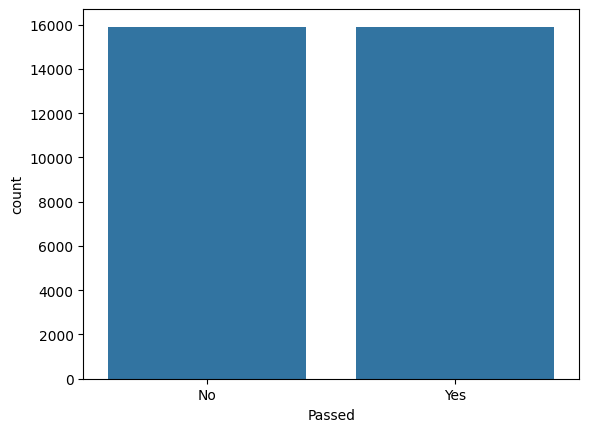

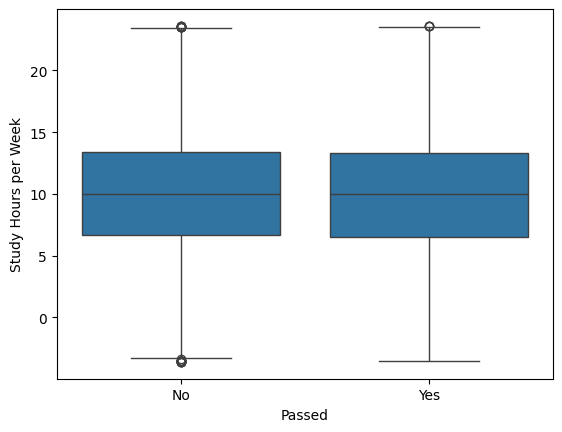

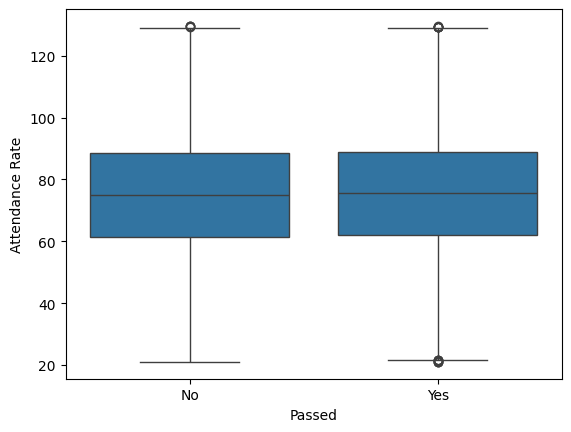

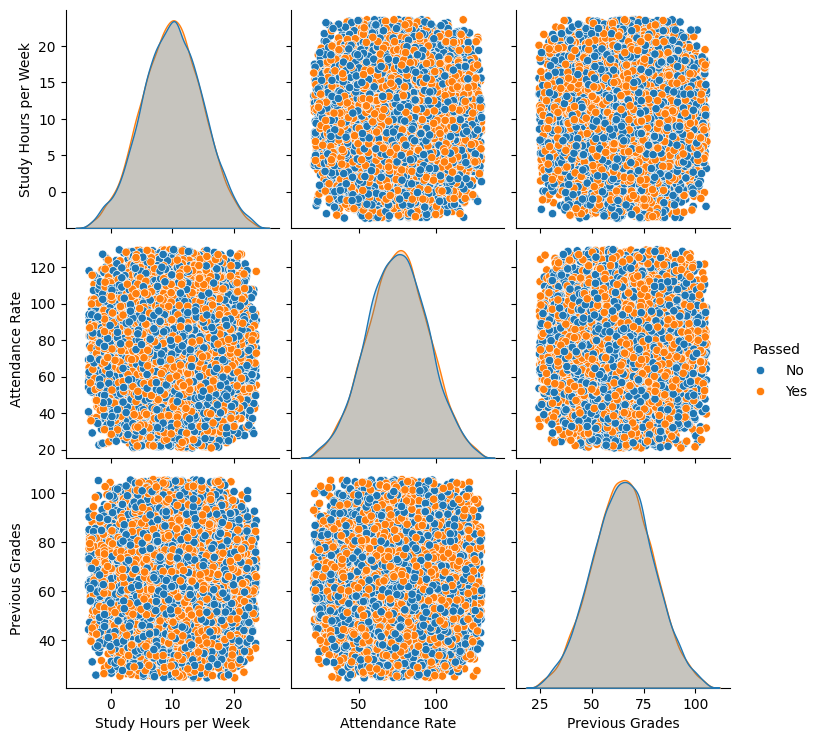

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of target variable
sns.countplot(x='Passed', data=df)
plt.show()

# Study hours vs Pass/Fail
sns.boxplot(x='Passed', y='Study Hours per Week', data=df)
plt.show()

# Attendance Rate vs Pass/Fail
sns.boxplot(x='Passed', y='Attendance Rate', data=df)
plt.show()

# Pairplot to observe relationships
sns.pairplot(df, hue='Passed')
plt.show()

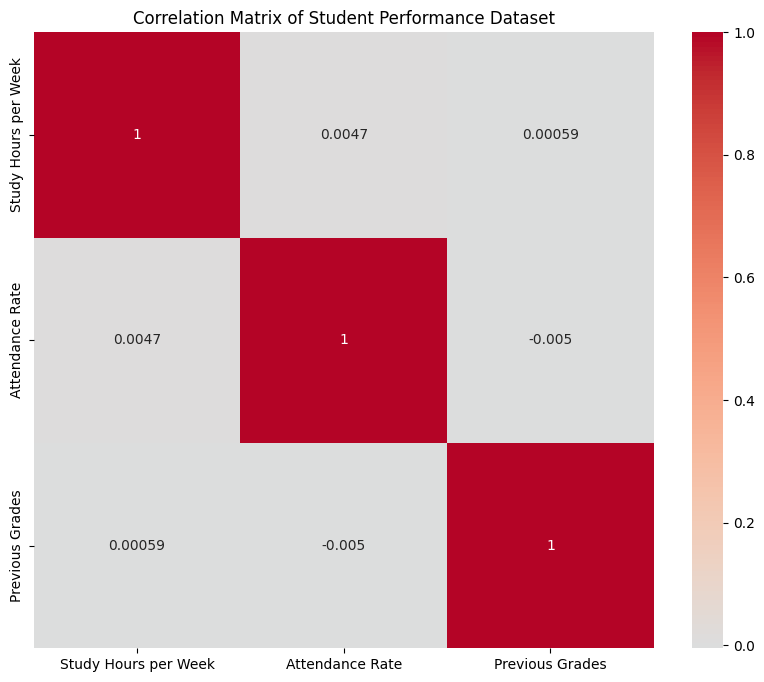

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  # Importing the matplotlib.pyplot module

# Load your dataset
df = pd.read_csv('/content/student_performance_prediction.csv')

# Select numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Calculate the correlation matrix
corr_matrix = df[numeric_cols].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Student Performance Dataset')
plt.show()


Identifying Outliers

In [ ]:
def find_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

for col in numerical_columns:
    outliers = find_outliers(df, col)
    print(f'Outliers in {col}:')
    print(outliers)

Outliers in Study Hours per Week:
      Student ID  Study Hours per Week  Attendance Rate  Previous Grades  \
209       S00210                  29.3              NaN             55.1   
262       S00263                  -6.2             98.7             26.2   
478       S00479                  25.4             84.5             53.0   
1061      S01062                  -4.2             70.8             46.3   
1539      S01540                  -4.4             77.7             54.0   
...          ...                   ...              ...              ...   
39499     S39500                  -4.2             57.0             33.3   
39527     S39528                  -4.5             66.9             73.7   
39575     S39576                  24.3             61.8             48.0   
39616     S39617                  -7.2             97.8             46.3   
39838     S39839                  26.5              NaN             69.3   

      Participation in Extracurricular Activities Par

Handle Outliers - Option 1: Remove Outliers

In [ ]:
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

for col in numerical_columns:
    df = remove_outliers(df, col)

Handle Outliers - Option 2: Transform Data (e.g., Log Transformation)

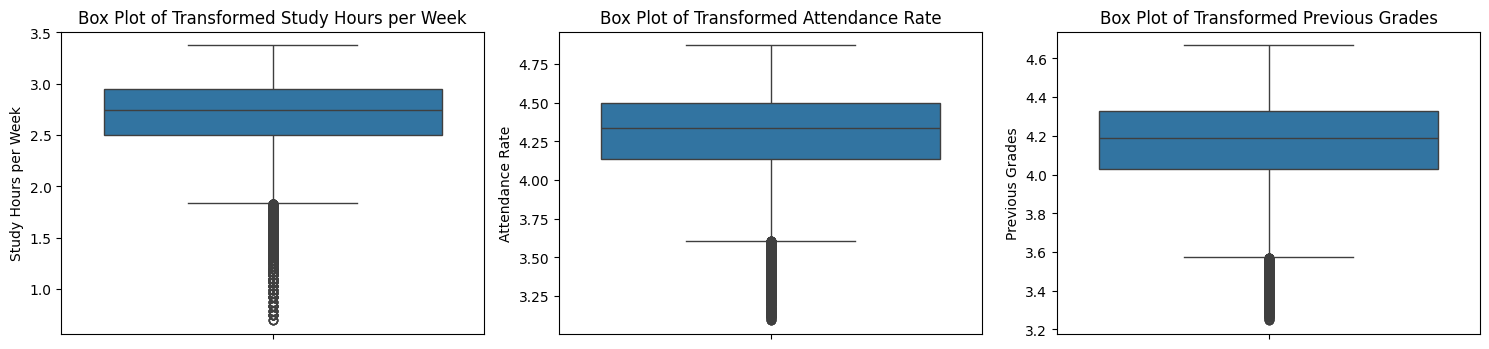

In [ ]:
# Handling zeros or negative values by adding a small constant to all data (if needed)
df_transformed = df.copy()

for col in numerical_columns:
    if (df_transformed[col] <= 0).any():
        df_transformed[col] = df_transformed[col] + abs(df_transformed[col].min()) + 1

    df_transformed[col] = np.log1p(df_transformed[col])

# Now you can plot the transformed data
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=col, data=df_transformed)
    plt.title(f'Box Plot of Transformed {col}')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical variables
label_encoder = LabelEncoder()
df['Participation in Extracurricular Activities'] = label_encoder.fit_transform(df['Participation in Extracurricular Activities'])
df['Parent Education Level'] = label_encoder.fit_transform(df['Parent Education Level'])
df['Passed'] = label_encoder.fit_transform(df['Passed'])

# Scaling numerical features
scaler = StandardScaler()
df[['Study Hours per Week', 'Attendance Rate', 'Previous Grades']] = scaler.fit_transform(df[['Study Hours per Week', 'Attendance Rate', 'Previous Grades']])

# Check the preprocessed data
df.head()

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
1,S00002,-0.137735,1.030657,-0.306629,0,3,0
3,S00004,1.558591,0.084101,-0.183138,1,1,0
4,S00005,-0.239923,0.723666,0.523506,0,4,0
5,S00006,-0.239923,-0.069395,0.290245,1,3,1
6,S00007,1.619904,-1.870410,1.957374,0,2,1


In [ ]:
df['Commitment Score'] = df['Study Hours per Week'] * df['Attendance Rate']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define features and target
X = df.drop(columns=['Student ID', 'Passed'])
y = df['Passed']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.47409287740779454
              precision    recall  f1-score   support

           0       0.47      0.51      0.49      3131
           1       0.48      0.49      0.48      3206
           2       0.00      0.00      0.00       360

    accuracy                           0.47      6697
   macro avg       0.32      0.33      0.32      6697
weighted avg       0.45      0.47      0.46      6697



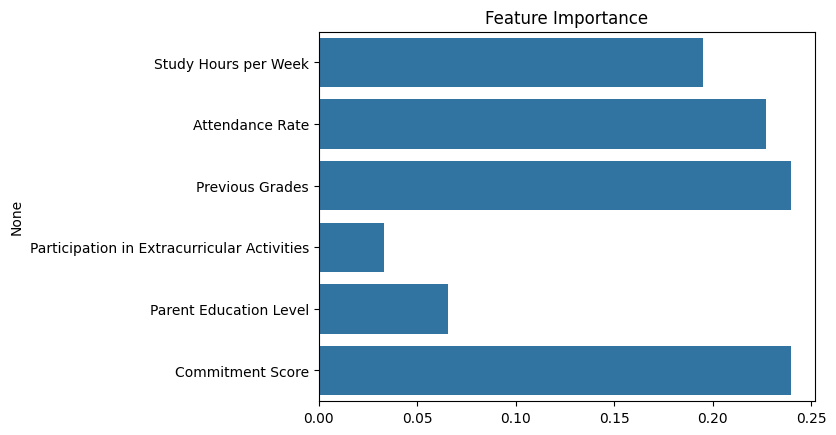

In [ ]:
# Feature importance
importances = rf_model.feature_importances_
features = X.columns

# Plot feature importance
sns.barplot(x=importances, y=features)
plt.title('Feature Importance')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and score
print(grid_search.best_params_)
print(grid_search.best_score_)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
